<a href="https://colab.research.google.com/github/Itiel-z/Intro-to-AI-colab/blob/main/Assignment_12/Assignment_12_Intro2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 12 - Itiel

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(f"x_train has the following images, height and width of each image in pixels and color channels: {x_train.shape} respectively")
print(f"x_test has the following images, height and width of each image in pixels and color channels: {x_test.shape} respectively")

x_train has the following images, height and width of each image in pixels and color channels: (50000, 32, 32, 3) respectively
x_test has the following images, height and width of each image in pixels and color channels: (10000, 32, 32, 3) respectively


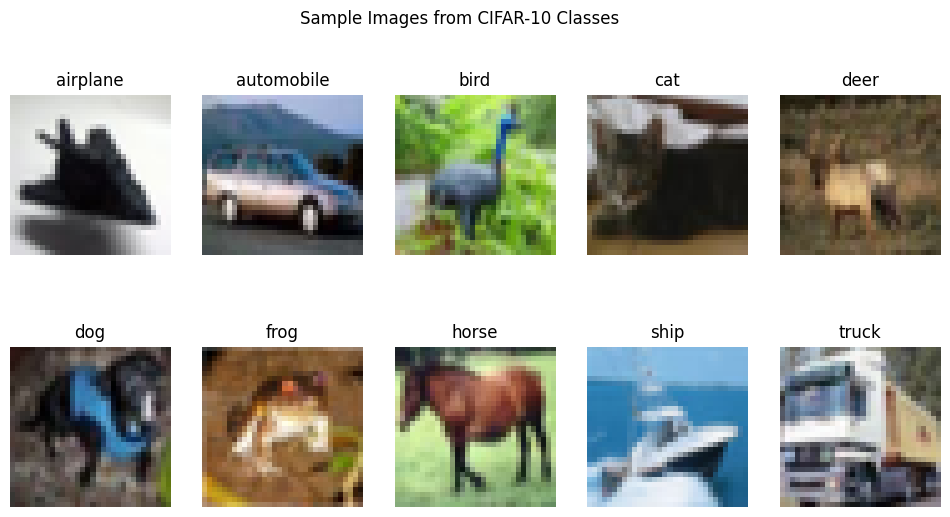

In [4]:
# Visualize Sample Images from Each Class
plt.figure(figsize=(12,6))
for i in range(10):
    idx = np.where(y_train == i)[0][0]  # get first index for each class
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Sample Images from CIFAR-10 Classes')
plt.show()

In [5]:
# Normalize pixel values to [0,1]
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

In [6]:
# Flatten images from 3D array to 1D vector for feedforward Neural Network input (32*32*3 = 3072 features)
x_train_flat = x_train_norm.reshape(x_train_norm.shape[0], -1)
x_test_flat = x_test_norm.reshape(x_test_norm.shape[0], -1)

In [7]:
# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [8]:
# Define the Feedforward Neural Network Model
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(3072,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the Model
dzidza = model.fit(x_train_flat, y_train_cat,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/15
625/625 - 16s - 26ms/step - accuracy: 0.4996 - loss: 1.4062 - val_accuracy: 0.4728 - val_loss: 1.4940
Epoch 2/15
625/625 - 17s - 27ms/step - accuracy: 0.5044 - loss: 1.3803 - val_accuracy: 0.4763 - val_loss: 1.4858
Epoch 3/15
625/625 - 16s - 26ms/step - accuracy: 0.5103 - loss: 1.3622 - val_accuracy: 0.4753 - val_loss: 1.4937
Epoch 4/15
625/625 - 21s - 34ms/step - accuracy: 0.5179 - loss: 1.3419 - val_accuracy: 0.4910 - val_loss: 1.4514
Epoch 5/15
625/625 - 20s - 31ms/step - accuracy: 0.5271 - loss: 1.3219 - val_accuracy: 0.4921 - val_loss: 1.4470
Epoch 6/15
625/625 - 20s - 33ms/step - accuracy: 0.5329 - loss: 1.3025 - val_accuracy: 0.4867 - val_loss: 1.4686
Epoch 7/15
625/625 - 22s - 35ms/step - accuracy: 0.5402 - loss: 1.2826 - val_accuracy: 0.4898 - val_loss: 1.4531
Epoch 8/15
625/625 - 19s - 30ms/step - accuracy: 0.5475 - loss: 1.2679 - val_accuracy: 0.4857 - val_loss: 1.4823
Epoch 9/15
625/625 - 21s - 34ms/step - accuracy: 0.5523 - loss: 1.2497 - val_accuracy: 0.4892 - 

In [13]:
# 7. Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.4940
Test Loss: 1.4728


In [14]:
# Predictions and Classification Report
y_pred_prob = model.predict(x_test_flat)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test.flatten()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.61      0.51      0.56      1000
  automobile       0.64      0.56      0.60      1000
        bird       0.41      0.35      0.38      1000
         cat       0.35      0.38      0.36      1000
        deer       0.41      0.50      0.45      1000
         dog       0.43      0.40      0.41      1000
        frog       0.56      0.49      0.53      1000
       horse       0.62      0.48      0.54      1000
        ship       0.45      0.79      0.57      1000
       truck       0.60      0.48      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



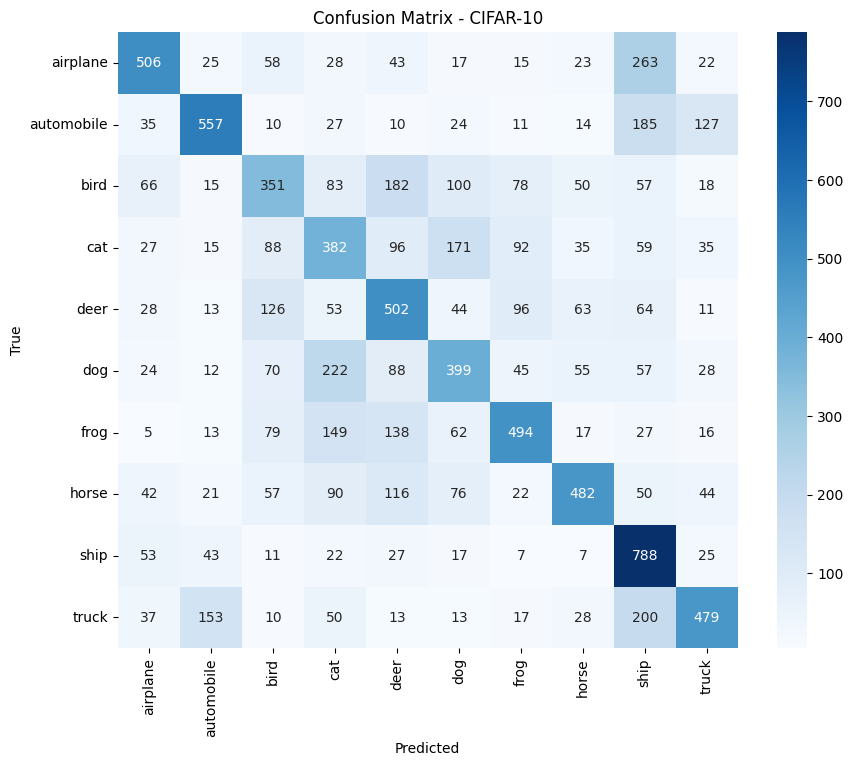

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CIFAR-10')
plt.show()

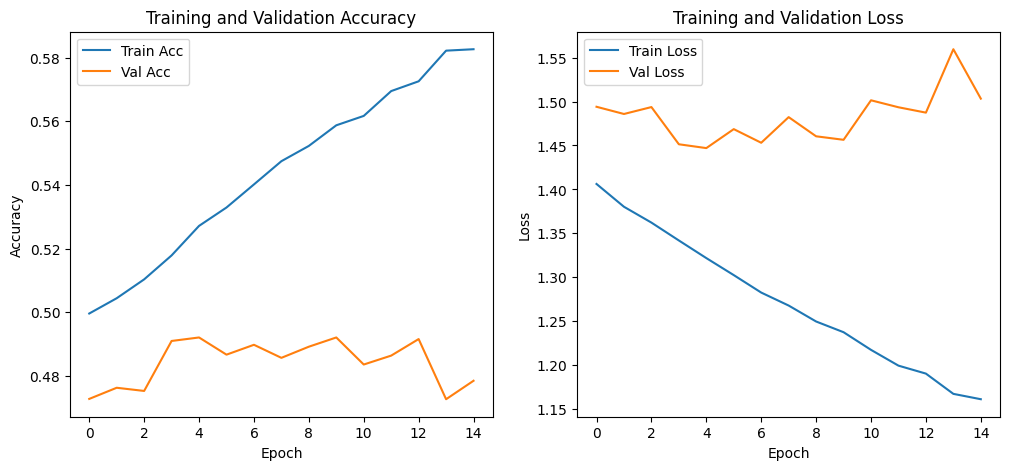

In [17]:
# 10. Plot Training dzidza: Accuracy and Loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(dzidza.history['accuracy'], label='Train Acc')
plt.plot(dzidza.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(dzidza.history['loss'], label='Train Loss')
plt.plot(dzidza.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
The end